In [1]:
import zipfile
import os

base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/'

# 압축 파일 경로
zip_file = base_dir + "r_s_p.zip"
# 압축 해제할 폴더 경로
extract_to_folder = base_dir + "data"

# data 폴더가 없다면 생성
os.makedirs(extract_to_folder, exist_ok=True)

# zipfile 모듈을 사용하여 압축 해제
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print("압축 해제가 완료되었습니다.")

압축 해제가 완료되었습니다.


In [2]:
from PIL import Image
import glob
import os

print('PIL 라이브러리 import 완료!')

PIL 라이브러리 import 완료!


가위 버전을 두가지 버전으로 촬영을 해서 하나로 합침

In [3]:
# 지금은 필요없음
# import os

# def move_and_rename_images(source_folder, dest_folder):
#     # scissor2 폴더 내의 모든 파일 가져오기
#     images_folder2 = [os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.endswith('.jpg')]
    
#     # scissor2 폴더의 파일명 변경 및 scissor 폴더로 이동
#     for idx, img_path in enumerate(images_folder2):
#         # 파일명 변경
#         new_img_path = os.path.join(source_folder, f"scissor2_{idx}.jpg")
#         os.rename(img_path, new_img_path)
#         # scissor 폴더로 이동
#         dest_img_path = os.path.join(dest_folder, f"scissor2_{idx}.jpg")
#         os.rename(new_img_path, dest_img_path)

# # scissor2 폴더와 scissor 폴더의 경로
# source_folder = base_dir + "scissor2"
# dest_folder = base_dir + "scissor"

# # 이미지 파일 이동 및 파일명 변경
# move_and_rename_images(source_folder, dest_folder)


각 폴더에 있는 데이터 수를 확인해보자

In [4]:
def count_images_in_folders(root_folder):
    # 각 폴더의 이미지 파일 개수를 저장할 딕셔너리
    image_counts = {}
    
    # root_folder 내의 모든 폴더 탐색
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        # 디렉토리인 경우에만 처리
        if os.path.isdir(folder_path):
            # 해당 폴더 내의 이미지 파일 개수 확인
            image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
            image_counts[folder_name] = len(image_files)
    
    return image_counts

# 이미지가 있는 폴더의 경로
root_folder =base_dir + 'data'

# 각 폴더의 이미지 파일 개수 확인
image_counts = count_images_in_folders(root_folder)

# 결과 출력
for folder_name, count in image_counts.items():
    print(f"{folder_name} 폴더 내의 이미지 파일 개수:", count)


__MACOSX 폴더 내의 이미지 파일 개수: 0
.ipynb_checkpoints 폴더 내의 이미지 파일 개수: 0
scissor 폴더 내의 이미지 파일 개수: 1479
test 폴더 내의 이미지 파일 개수: 0
paper 폴더 내의 이미지 파일 개수: 981
rock 폴더 내의 이미지 파일 개수: 1044


scissor 를 합치다 보니 데이터 수가 많아졌다.<br>
각 데이터 숫자를 150개로 맞춰보자<br>
이미지를 랜덤하게 뽑아서 970개로 만들자

In [5]:
import random
import shutil

def move_random_images(source_folder, dest_folder, num_images):
    # 폴더가 없으면 생성
    os.makedirs(dest_folder, exist_ok=True)
    
    # 폴더 내의 이미지 파일들 리스트 가져오기
    image_files = [file for file in os.listdir(source_folder) if file.endswith('.jpg')]
    
    # 랜덤하게 이미지 파일 선택
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # 이미지 파일을 목적지 폴더로 이동
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        dest_path = os.path.join(dest_folder, image)
        shutil.move(source_path, dest_path)

# 이미지가 있는 폴더의 경로
base_folder = base_dir + 'data'
folders = ["rock", "scissor", "paper"]

# 랜덤하게 선택할 이미지 개수
num_images = 970

# 각 폴더에 대해 이미지 이동
for folder in folders:
    source_folder = os.path.join(base_folder, folder)
    dest_folder = os.path.join(base_folder, "train", folder)
    move_random_images(source_folder, dest_folder, num_images)

print("이미지 이동 완료")

이미지 이동 완료


각각의 이미지를 똑같이 만들어보았다.

In [6]:
import os
import glob
from PIL import Image

def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), 'images to be resized.')
    
    target_size = (100, 100)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), "images resized.")

# 이미지가 들어있는 폴더들을 반복하면서 이미지 크기를 변경합니다.
base_dir = os.path.expanduser("~") + "/aiffel/aiffel_quest/rock_scissor_paper_240306/data/train"
folders = ['rock', 'scissor', 'paper']

for folder in folders:
    image_dir_path = os.path.join(base_dir, folder)
    resize_images(image_dir_path)

print("이미지 resize 완료!")

970 images to be resized.
970 images resized.
970 images to be resized.
970 images resized.
970 images to be resized.
970 images resized.
이미지 resize 완료!


In [7]:
import numpy as np

def load_data(img_path, number_of_data=2910):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = base_dir
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2910 입니다.
x_train shape: (2910, 100, 100, 3)
y_train shape: (2910,)


라벨:  0


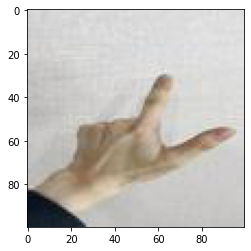

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


n_channel_1=32
n_channel_2=64
n_dense=10
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(100,100,3))) # 컬러기 때문에 3으로 진행
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=n_train_epoch)
history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                338570    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

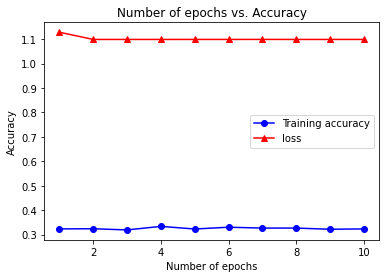

In [10]:
accuracy_train = history.history['accuracy']
accuracy_loss = history.history['loss']
epochs_ = range(1, n_train_epoch + 1)

# 정확도 그래프 플로팅
plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker='o')
plt.plot(epochs_, accuracy_loss, label='loss', color='red', marker='^')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Number of epochs vs. Accuracy')
plt.legend()
plt.show()

In [11]:
base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/'

# 압축 파일 경로
zip_file = base_dir + "Archive.zip"
# 압축 해제할 폴더 경로
extract_to_folder = base_dir + "data/test"

# data 폴더가 없다면 생성
os.makedirs(extract_to_folder, exist_ok=True)

# zipfile 모듈을 사용하여 압축 해제
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print("압축 해제가 완료되었습니다.")

압축 해제가 완료되었습니다.


In [12]:
# 이미지가 들어있는 폴더들을 반복하면서 이미지 크기를 변경합니다.
base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/data/test/ky'
folders = ['rock', 'scissor', 'paper']

for folder in folders:
    image_dir_path = os.path.join(base_dir, folder)
#     print(image_dir_path)
    resize_images(image_dir_path)

print("이미지 resize 완료!")

508 images to be resized.
508 images resized.
516 images to be resized.
516 images resized.
497 images to be resized.
497 images resized.
이미지 resize 완료!


In [13]:
# 이미지가 있는 폴더의 경로
root_folder = base_dir 

# 각 폴더의 이미지 파일 개수 확인
image_counts = count_images_in_folders(root_folder)

# 결과 출력
for folder_name, count in image_counts.items():
    print(f"{folder_name} 폴더 내의 이미지 파일 개수:", count)


scissor 폴더 내의 이미지 파일 개수: 516
paper 폴더 내의 이미지 파일 개수: 497
rock 폴더 내의 이미지 파일 개수: 508


test 데이터셋

In [14]:
def load_data(img_path, number_of_data=1521):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels





(x_test, y_test)=load_data(base_dir)
# print(base_dir)
# x_test.shape
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 1521 입니다.
x_test shape: (1521, 100, 100, 3)
y_test shape: (1521,)


In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


48/48 - 0s - loss: 1.0986 - accuracy: 0.3393
test_loss: 1.098608374595642
test_accuracy: 0.33925050497055054


정확도가 낮고 loss값이 너무 높다 이미지가 적어서 그런가?

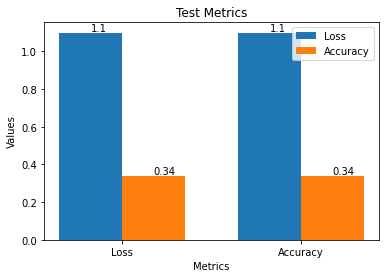

In [16]:
import matplotlib.pyplot as plt

# 결과 저장
test_loss_values = [test_loss]
test_accuracy_values = [test_accuracy]
metrics_names = ['Loss', 'Accuracy']

# 막대 그래프 그리기
fig, ax = plt.subplots()
index = range(len(metrics_names))
bar_width = 0.35

bar1 = ax.bar(index, test_loss_values, bar_width, label='Loss')
bar2 = ax.bar([i + bar_width for i in index], test_accuracy_values, bar_width, label='Accuracy')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Test Metrics')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrics_names)
ax.legend()

# 값 표시
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


In [17]:
# 모델 구성
n_channel_1 = 64
n_channel_2 = 128
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=n_train_epoch)
history

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

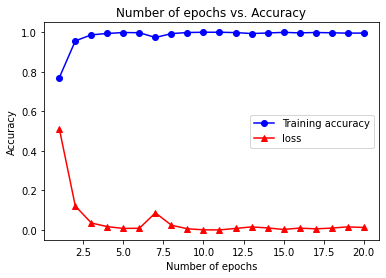

In [18]:
accuracy_train = history.history['accuracy']
accuracy_loss = history.history['loss']
epochs_ = range(1, n_train_epoch + 1)

# 정확도 그래프 플로팅
plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker='o')
plt.plot(epochs_, accuracy_loss, label='loss', color='red', marker='^')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Number of epochs vs. Accuracy')
plt.legend()
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


48/48 - 1s - loss: 11.3879 - accuracy: 0.3228
test_loss: 11.387853622436523
test_accuracy: 0.3228139281272888


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모델 구성
n_channel_1 = 64
n_channel_2 = 128
n_dense = 128
n_train_epoch = 20

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train_norm)

model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(datagen.flow(x_train_norm, y_train),validation_data=(x_test_norm, y_test), epochs=n_train_epoch)
history

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 67712)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

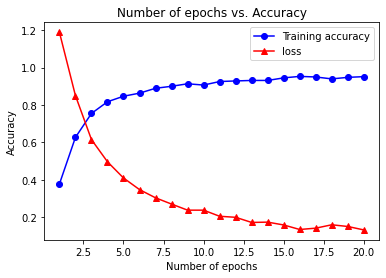

In [21]:
accuracy_train = history.history['accuracy']
accuracy_loss = history.history['loss']
epochs_ = range(1, n_train_epoch + 1)

# 정확도 그래프 플로팅
plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker='o')
plt.plot(epochs_, accuracy_loss, label='loss', color='red', marker='^')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Number of epochs vs. Accuracy')
plt.legend()
plt.show()

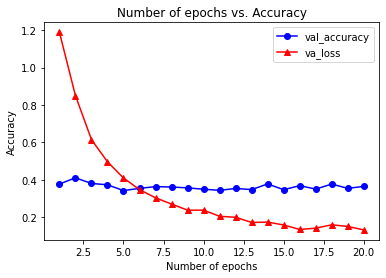

In [22]:
accuracy_train = history.history['val_accuracy']
accuracy_val = history.history['val_loss']
epochs_ = range(1, n_train_epoch + 1)

# 정확도 그래프 플로팅
plt.plot(epochs_, accuracy_train, label='val_accuracy', color='blue', marker='o')
plt.plot(epochs_, accuracy_loss, label='va_loss', color='red', marker='^')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Number of epochs vs. Accuracy')
plt.legend()
plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


48/48 - 0s - loss: 15.2461 - accuracy: 0.3642
test_loss: 15.246081352233887
test_accuracy: 0.364234060049057


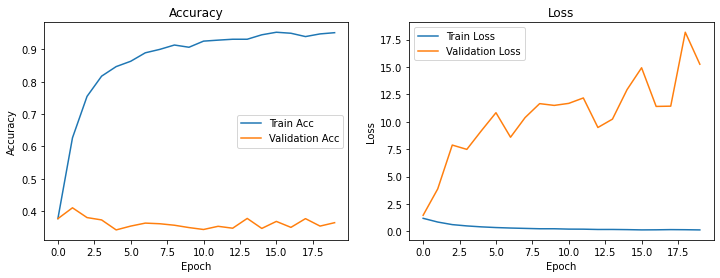

In [24]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 :', predicted_labels[idx])
print('실제 데이터의 라벨:', y_test[idx])

model.predict() 결과 :  [9.9998486e-01 1.5084760e-05 7.8906337e-10]
model이 추론한 가장 가능성이 높은 결과 : 0
실제 데이터의 라벨: 0


In [26]:
predicted_result

array([[9.9998486e-01, 1.5084760e-05, 7.8906337e-10],
       [1.0000000e+00, 2.4330706e-08, 8.6553438e-14],
       [9.9999809e-01, 2.2956254e-07, 1.6640181e-06],
       ...,
       [1.1592711e-06, 9.9999881e-01, 3.3986474e-27],
       [3.3951026e-01, 6.6048622e-01, 3.5793398e-06],
       [4.7011042e-01, 3.6570108e-01, 1.6418853e-01]], dtype=float32)

In [27]:
import pandas as pd

In [28]:
pd.Series(predicted_labels).value_counts()

0    1298
1     221
2       2
dtype: int64

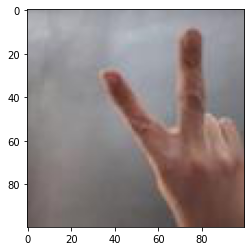

In [29]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [9.9997818e-01 2.1769712e-05 8.7584021e-17]
라벨: 1, 예측결과: 0


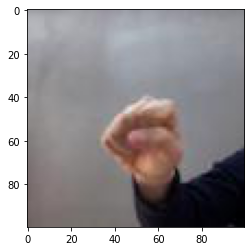

예측확률분포: [1.000000e+00 3.379041e-08 8.415060e-17]
라벨: 2, 예측결과: 0


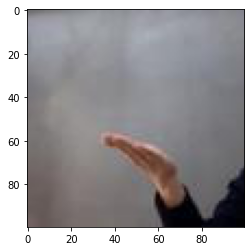

예측확률분포: [4.3091916e-08 1.0000000e+00 2.0260096e-26]
라벨: 2, 예측결과: 1


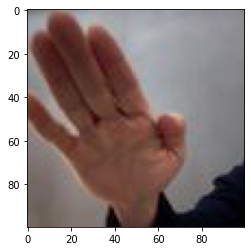

예측확률분포: [2.3775121e-02 9.7622490e-01 3.6130153e-08]
라벨: 0, 예측결과: 1


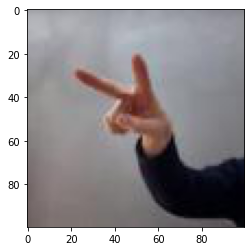

예측확률분포: [9.997009e-01 2.985708e-04 6.362470e-07]
라벨: 2, 예측결과: 0


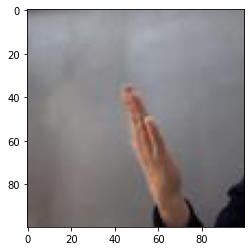

In [30]:
import random

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [31]:
# dense 추가
n_channel_1=32
n_channel_2=64
n_dense_1=64
n_dense_2=32
n_train_epoch=15


model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense_1, activation='relu'),
    keras.layers.Dense(n_dense_2, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
history = model.fit(datagen.flow(x_train_norm, y_train),validation_data=(x_test_norm, y_test), epochs=n_train_epoch)
history

Epoch 1/15
91/91 [==============================] - 7s 73ms/step - loss: 1.0703 - accuracy: 0.4213 - val_loss: 1.6444 - val_accuracy: 0.4267
Epoch 2/15
91/91 [==============================] - 6s 67ms/step - loss: 0.8102 - accuracy: 0.6502 - val_loss: 3.5249 - val_accuracy: 0.4366
Epoch 3/15
91/91 [==============================] - 6s 66ms/step - loss: 0.5211 - accuracy: 0.7931 - val_loss: 4.6684 - val_accuracy: 0.3688
Epoch 4/15
91/91 [==============================] - 6s 67ms/step - loss: 0.4276 - accuracy: 0.8357 - val_loss: 5.7449 - val_accuracy: 0.3511
Epoch 5/15
91/91 [==============================] - 6s 66ms/step - loss: 0.3047 - accuracy: 0.8924 - val_loss: 5.4571 - val_accuracy: 0.4162
Epoch 6/15
91/91 [==============================] - 6s 66ms/step - loss: 0.2559 - accuracy: 0.9107 - val_loss: 6.4376 - val_accuracy: 0.3636
Epoch 7/15
91/91 [==============================] - 6s 66ms/step - loss: 0.2235 - accuracy: 0.9168 - val_loss: 5.6689 - val_accuracy: 0.4057
Epoch 8/15
91

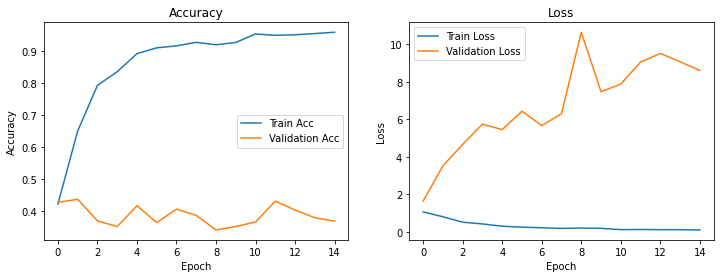

In [33]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


48/48 - 0s - loss: 8.6098 - accuracy: 0.3682
test_loss: 8.609781265258789
test_accuracy: 0.3681788444519043


## 이미지 augmnet

In [35]:
import os
import cv2
import numpy as np

base_dir = os.path.expanduser("~") + "/aiffel/aiffel_quest/rock_scissor_paper_240306/data/train"
folders = ['rock', 'scissor', 'paper']

# 이미지를 반전하고 회전하는 함수 정의
def augment_image(image_path, output_folder):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # 이미지 반전
    flipped_image = np.fliplr(image)
    
    # 이미지 회전 (예시로 90도 회전)
    rotated_image = np.rot90(image)
    
    # 새로운 파일 경로 생성
    base_name = os.path.basename(image_path)
    flipped_image_path = os.path.join(output_folder, base_name[:-4] + '_flipped' + base_name[-4:])
    rotated_image_path = os.path.join(output_folder, base_name[:-4] + '_rotated' + base_name[-4:])
    
    # 이미지 저장
    cv2.imwrite(flipped_image_path, flipped_image)
    cv2.imwrite(rotated_image_path, rotated_image)

# 각 폴더 내의 이미지를 반복하여 처리
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # 이미지 파일 확인
            # 이미지 파일 경로
            image_path = os.path.join(folder_path, filename)
            
            # 이미지 증가
            augment_image(image_path, folder_path)

print("이미지 증가 완료")


이미지 증가 완료


In [36]:
# 이미지가 있는 폴더의 경로
root_folder =base_dir 

# 각 폴더의 이미지 파일 개수 확인
image_counts = count_images_in_folders(root_folder)

# 결과 출력
for folder_name, count in image_counts.items():
    print(f"{folder_name} 폴더 내의 이미지 파일 개수:", count)

scissor 폴더 내의 이미지 파일 개수: 2910
paper 폴더 내의 이미지 파일 개수: 2910
rock 폴더 내의 이미지 파일 개수: 2910


대폭 상승했다.

In [37]:
def load_data(img_path, number_of_data=8730):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = base_dir
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 8730 입니다.
x_train shape: (8730, 100, 100, 3)
y_train shape: (8730,)


In [38]:
n_channel_1=32
n_channel_2=64
n_dense_1=64
n_dense_2=32
n_train_epoch=15

datagen.fit(x_train_norm)


model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense_1, activation='relu'),
    keras.layers.Dense(n_dense_2, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
history = model.fit(datagen.flow(x_train_norm, y_train),validation_data=(x_test_norm, y_test), epochs=n_train_epoch)
history

Epoch 1/15
273/273 [==============================] - 19s 69ms/step - loss: 0.9834 - accuracy: 0.4922 - val_loss: 3.3891 - val_accuracy: 0.4609
Epoch 2/15
273/273 [==============================] - 18s 67ms/step - loss: 0.5640 - accuracy: 0.7757 - val_loss: 4.6424 - val_accuracy: 0.3866
Epoch 3/15
273/273 [==============================] - 18s 66ms/step - loss: 0.4074 - accuracy: 0.8446 - val_loss: 4.8006 - val_accuracy: 0.3557
Epoch 4/15
273/273 [==============================] - 18s 67ms/step - loss: 0.3057 - accuracy: 0.8795 - val_loss: 6.5923 - val_accuracy: 0.3748
Epoch 5/15
273/273 [==============================] - 18s 67ms/step - loss: 0.2684 - accuracy: 0.9001 - val_loss: 9.0025 - val_accuracy: 0.3570
Epoch 6/15
273/273 [==============================] - 18s 67ms/step - loss: 0.2118 - accuracy: 0.9180 - val_loss: 14.9953 - val_accuracy: 0.3353
Epoch 7/15
273/273 [==============================] - 18s 67ms/step - loss: 0.1905 - accuracy: 0.9294 - val_loss: 14.9646 - val_accurac

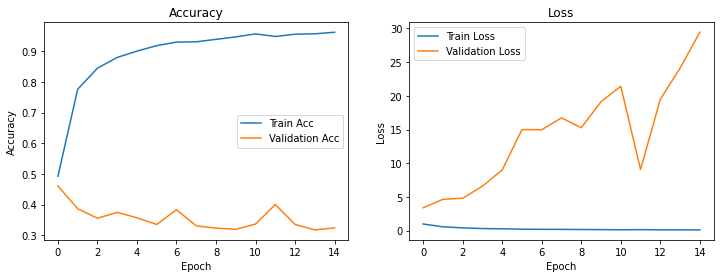

In [40]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [41]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


48/48 - 0s - loss: 29.4329 - accuracy: 0.3241
test_loss: 29.432947158813477
test_accuracy: 0.3241288661956787


In [42]:
def load_data(img_path, number_of_data=8730):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = base_dir
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 8730 입니다.
x_train shape: (8730, 100, 100, 3)
y_train shape: (8730,)


In [43]:
# data genartor 제거 후 학습

n_channel_1=32
n_channel_2=64
n_dense_1=64
n_dense_2=32
n_train_epoch=15




model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense_1, activation='relu'),
    keras.layers.Dense(n_dense_2, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [44]:
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split = 0.2)
history

Epoch 1/15
219/219 [==============================] - 4s 15ms/step - loss: 0.6233 - accuracy: 0.7282 - val_loss: 0.3290 - val_accuracy: 0.8585
Epoch 2/15
219/219 [==============================] - 2s 11ms/step - loss: 0.1612 - accuracy: 0.9389 - val_loss: 0.1111 - val_accuracy: 0.9519
Epoch 3/15
219/219 [==============================] - 2s 10ms/step - loss: 0.0806 - accuracy: 0.9725 - val_loss: 0.0719 - val_accuracy: 0.9696
Epoch 4/15
219/219 [==============================] - 2s 11ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.1525 - val_accuracy: 0.9410
Epoch 5/15
219/219 [==============================] - 2s 11ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.1217 - val_accuracy: 0.9536
Epoch 6/15
219/219 [==============================] - 2s 11ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0973 - val_accuracy: 0.9674
Epoch 7/15
219/219 [==============================] - 2s 11ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0543 - val_accuracy: 0.9811

In [45]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


48/48 - 0s - loss: 12.0431 - accuracy: 0.3984
test_loss: 12.043110847473145
test_accuracy: 0.39842209219932556


In [46]:
base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/'

# 압축 파일 경로
zip_file = base_dir + "Archive_2.zip"
# 압축 해제할 폴더 경로
extract_to_folder = base_dir + "data/test/kp"

# data 폴더가 없다면 생성
os.makedirs(extract_to_folder, exist_ok=True)

# zipfile 모듈을 사용하여 압축 해제
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print("압축 해제가 완료되었습니다.")

압축 해제가 완료되었습니다.


테스트용 데이터도 변경을 해보자, 이것도 차이를 줄 것 같다.

In [47]:
# 이미지가 들어있는 폴더들을 반복하면서 이미지 크기를 변경합니다.
base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/data/test/kp'
folders = ['rock', 'scissor', 'paper']

for folder in folders:
    image_dir_path = os.path.join(base_dir, folder)
#     print(image_dir_path)
    resize_images(image_dir_path)

print("이미지 resize 완료!")

220 images to be resized.
220 images resized.
220 images to be resized.
220 images resized.
220 images to be resized.
220 images resized.
이미지 resize 완료!


In [48]:
# 이미지가 있는 폴더의 경로
root_folder = base_dir 

# 각 폴더의 이미지 파일 개수 확인
image_counts = count_images_in_folders(root_folder)

# 결과 출력
for folder_name, count in image_counts.items():
    print(f"{folder_name} 폴더 내의 이미지 파일 개수:", count)


__MACOSX 폴더 내의 이미지 파일 개수: 0
scissor 폴더 내의 이미지 파일 개수: 220
paper 폴더 내의 이미지 파일 개수: 220
rock 폴더 내의 이미지 파일 개수: 220


In [49]:
def load_data(img_path, number_of_data=660):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels





(x_test, y_test)=load_data(base_dir)
# print(base_dir)
# x_test.shape
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 660 입니다.
x_test shape: (660, 100, 100, 3)
y_test shape: (660,)


In [50]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


21/21 - 0s - loss: 8.3019 - accuracy: 0.4864
test_loss: 8.301918029785156
test_accuracy: 0.48636364936828613


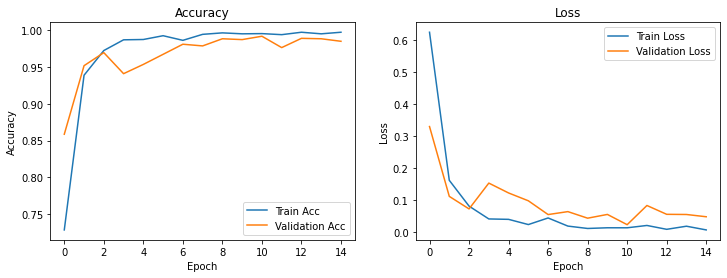

In [51]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

유명한 모델을 사용하면 조금 달라지지 않을까?
EfficientNET을 사용해보자

In [52]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 입력 이미지 크기 설정
input_shape = (100, 100, 3)

# EfficientNetB0 모델 불러오기 (weights='imagenet'은 ImageNet 데이터셋으로 사전 훈련된 가중치 사용)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)

# GlobalAveragePooling2D 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)

# 분류기 추가 (여기서는 10개의 클래스로 분류하는 예시)
output = Dense(3, activation='softmax')(x)

# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 100, 100, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 100, 100, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 101, 101, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [53]:
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split = 0.2)
history

Epoch 1/15
219/219 [==============================] - 146s 527ms/step - loss: 0.1346 - accuracy: 0.9601 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 2/15
219/219 [==============================] - 108s 491ms/step - loss: 0.0587 - accuracy: 0.9832 - val_loss: 1.3614 - val_accuracy: 0.0023
Epoch 3/15
219/219 [==============================] - 108s 492ms/step - loss: 0.0370 - accuracy: 0.9898 - val_loss: 3.2337 - val_accuracy: 0.0395
Epoch 4/15
219/219 [==============================] - 108s 492ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.4023 - val_accuracy: 1.0000
Epoch 5/15
219/219 [==============================] - 108s 491ms/step - loss: 0.0193 - accuracy: 0.9950 - val_loss: 0.2043 - val_accuracy: 1.0000
Epoch 6/15
219/219 [==============================] - 108s 492ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.3001 - val_accuracy: 1.0000
Epoch 7/15
219/219 [==============================] - 108s 492ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0405 -

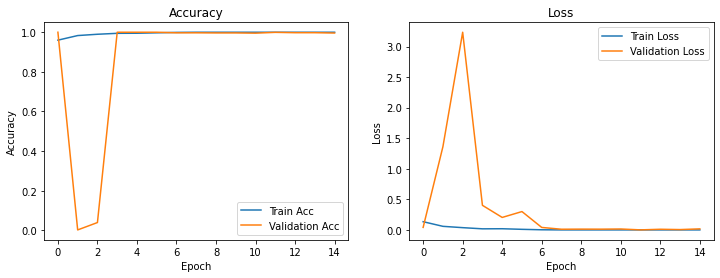

In [54]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [55]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

21/21 - 3s - loss: 0.8189 - accuracy: 0.8167
test_loss: 0.8189079761505127
test_accuracy: 0.8166666626930237


굉장히 정확도가 많이 올랐다. 과적합 때문인거 같으니 드랍아웃을 추가하자

과적합 추가 후 재학습

In [56]:
from tensorflow.keras.layers import Dropout

# 입력 이미지 크기 설정
input_shape = (100, 100, 3)

# EfficientNetB7 모델 불러오기 (weights='imagenet'은 ImageNet 데이터셋으로 사전 훈련된 가중치 사용)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)

# GlobalAveragePooling2D 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Dropout 레이어 추가
x = Dropout(0.5)(x)

# 분류기 추가 (여기서는 3개의 클래스로 분류하는 예시)
output = Dense(3, activation='softmax')(x)

# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 100, 100, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 100, 100, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 101, 101, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

__________________________________________________________________________________________________
block7b_se_expand (Conv2D)      (None, 1, 1, 3840)   618240      block7b_se_reduce[0][0]          
__________________________________________________________________________________________________
block7b_se_excite (Multiply)    (None, 4, 4, 3840)   0           block7b_activation[0][0]         
                                                                 block7b_se_expand[0][0]          
__________________________________________________________________________________________________
block7b_project_conv (Conv2D)   (None, 4, 4, 640)    2457600     block7b_se_excite[0][0]          
__________________________________________________________________________________________________
block7b_project_bn (BatchNormal (None, 4, 4, 640)    2560        block7b_project_conv[0][0]       
__________________________________________________________________________________________________
block7b_dr

In [57]:
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split = 0.2)
history

Epoch 1/15
219/219 [==============================] - 139s 516ms/step - loss: 0.1651 - accuracy: 0.9470 - val_loss: 0.3224 - val_accuracy: 1.0000
Epoch 2/15
219/219 [==============================] - 108s 493ms/step - loss: 0.0387 - accuracy: 0.9894 - val_loss: 2.1181 - val_accuracy: 0.1060
Epoch 3/15
219/219 [==============================] - 108s 493ms/step - loss: 0.0227 - accuracy: 0.9937 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 4/15
219/219 [==============================] - 108s 492ms/step - loss: 0.0381 - accuracy: 0.9900 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/15
219/219 [==============================] - 108s 493ms/step - loss: 0.0177 - accuracy: 0.9957 - val_loss: 4.9259 - val_accuracy: 0.0000e+00
Epoch 6/15
219/219 [==============================] - 108s 493ms/step - loss: 0.0289 - accuracy: 0.9930 - val_loss: 0.2839 - val_accuracy: 1.0000
Epoch 7/15
219/219 [==============================] - 112s 514ms/step - loss: 0.0171 - accuracy: 0.9958 - val_loss: 0.47

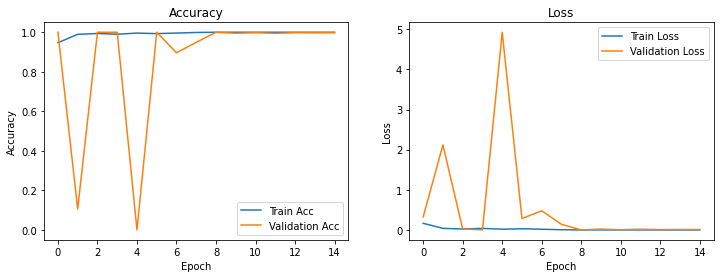

In [58]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [59]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

21/21 - 2s - loss: 1.2754 - accuracy: 0.7242
test_loss: 1.2754017114639282
test_accuracy: 0.7242424488067627


모든 값들이 안좋아졌다.<br>
epochs 수와 레이어 추가 및 드랍아웃도 추가하여 진행해보자

In [60]:
from tensorflow.keras.layers import Dropout, Flatten, Dense

n_train_epoch = 20

# 입력 이미지 크기 설정
input_shape = (100, 100, 3)

# EfficientNetB7 모델 불러오기 (weights='imagenet'은 ImageNet 데이터셋으로 사전 훈련된 가중치 사용)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)

# GlobalAveragePooling2D 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Dropout 레이어 추가
x = Dropout(0.5)(x)

# 추가적인 완전 연결 레이어 추가
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# Flatten 레이어 추가
x = Flatten()(x)

# 분류기 추가 (여기서는 3개의 클래스로 분류하는 예시)
output = Dense(3, activation='softmax')(x)

# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 100, 100, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 100, 100, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 101, 101, 3)  0           normalization_2[0][0]            
____________________________________________________________________________________________

Total params: 66,723,226
Trainable params: 66,412,499
Non-trainable params: 310,727
__________________________________________________________________________________________________


In [61]:
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split = 0.2)
history

Epoch 1/20
219/219 [==============================] - 140s 516ms/step - loss: 0.2065 - accuracy: 0.9380 - val_loss: 1.6229 - val_accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 108s 493ms/step - loss: 0.0974 - accuracy: 0.9738 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 3/20
219/219 [==============================] - 108s 493ms/step - loss: 0.0808 - accuracy: 0.9861 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4/20
219/219 [==============================] - 108s 493ms/step - loss: 0.0157 - accuracy: 0.9964 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 5/20
219/219 [==============================] - 108s 493ms/step - loss: 0.0492 - accuracy: 0.9857 - val_loss: 0.2405 - val_accuracy: 1.0000
Epoch 6/20
219/219 [==============================] - 108s 493ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 7/20
219/219 [==============================] - 108s 493ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.01

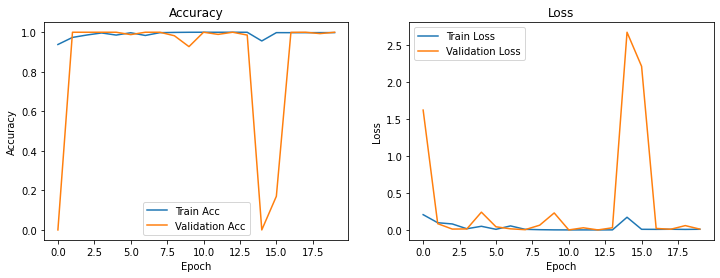

In [62]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [63]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

21/21 - 2s - loss: 1.3583 - accuracy: 0.4409
test_loss: 1.3583067655563354
test_accuracy: 0.44090908765792847


### 회고
- 이미지 학습을 진행하는데 재미가 있었다.
- 각각 이미지를 촬영을 하고 학습데이터로 사용을 하는게 재미있었다.
- 꽤 많은 이미지를 학습했다고 했는데 생각보다 정확도가 낮아서 아쉽다.
- 추후에 이미지 augmet를 해서 진행을 해보아야겠다.
- 이미지 반전 및 회전을 해서 이미지를 더 늘려보아야겠다.
- 이미지 증강 및 유명 모델을 사용하니 확실히 정확도가 증가한다는 것을 확인했다
- 역시 GPU로 학습하는게 좋다
- 정확도를 올리는데에 많은 것들을 고려해야겠다.
- efficientNET 기본이 정확도가 가장 높았지만 loss 값도 지지나치게 높다.
- loss: 0.8189 - accuracy: **0.8167**
- test_loss: 0.8189079761505127
- test_accuracy: 0.8166666626930237

![nn](gpu.png)